In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import (confusion_matrix, classification_report, RocCurveDisplay)



1. Dataset Overview: Load the dataset (dataset1.csv). Inspect the dataset by describing its structure, including the number of rows and columns, types of features, and a summary of the data.

In [3]:
df = pd.read_csv("dataset1.csv")

print("Shape:", df.shape)
display(df.head())
print("\nDtypes:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())
display(df.describe(include='all'))

Shape: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



Dtypes:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


2. Data Visualization: Create visualizations to understand the data better. For example, create scatter plots or pair plots to visualize relationships between features and the species.

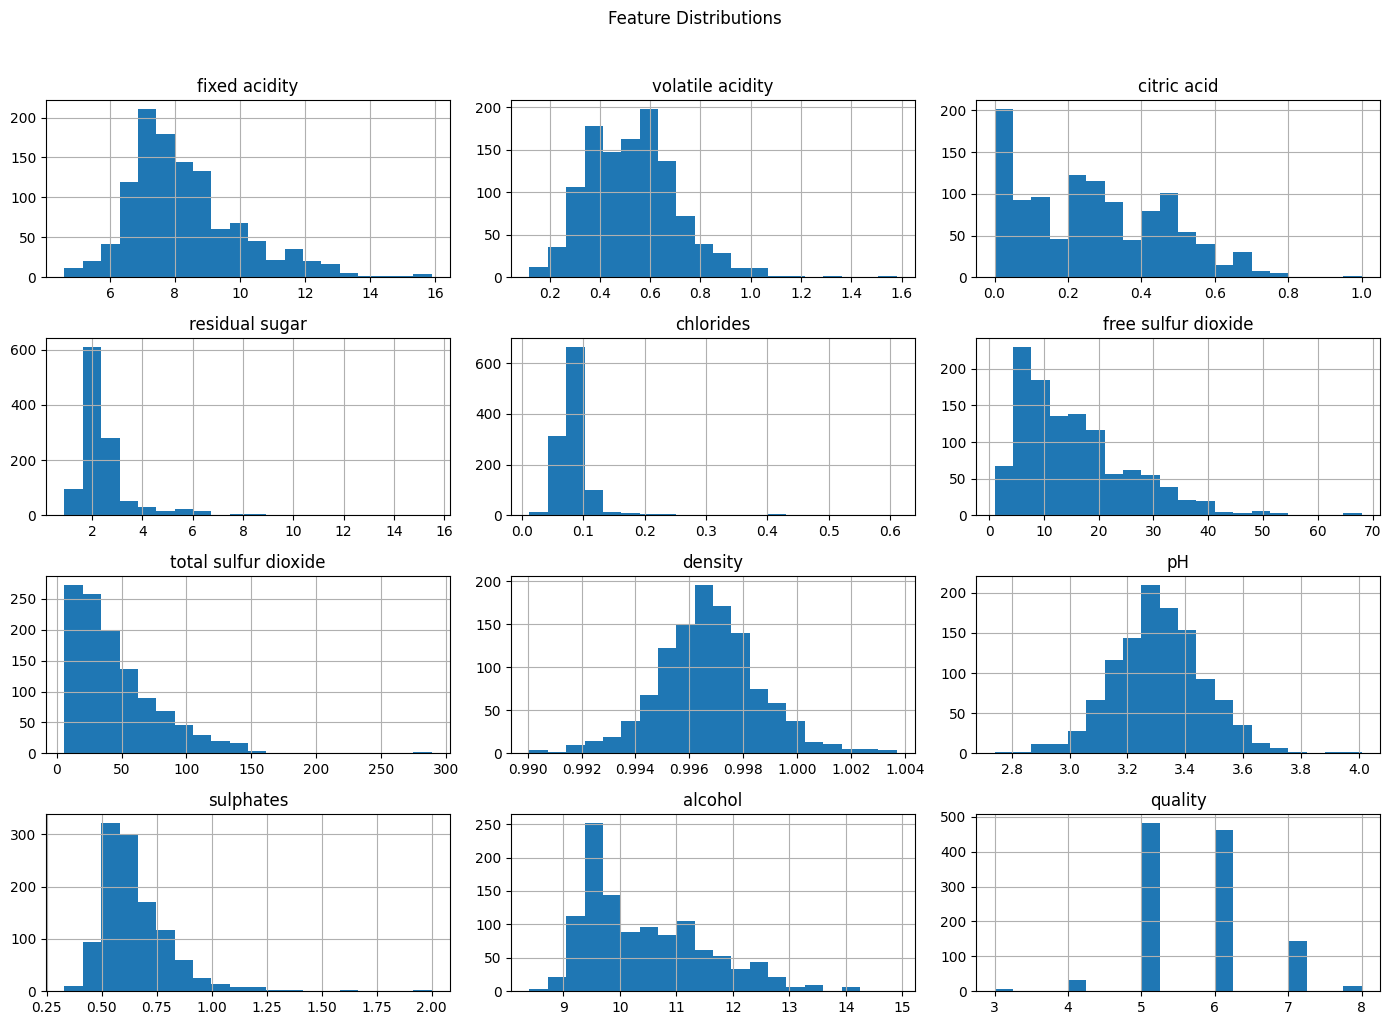

In [28]:
# Helpers

to_drop = 'Id' #silly doing histogram for ID
num_cols = df.select_dtypes('number').columns.drop(to_drop, errors='ignore') 

# Univariate Look (Distributions)
df[num_cols].hist(figsize=(14,10), bins = 20)
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

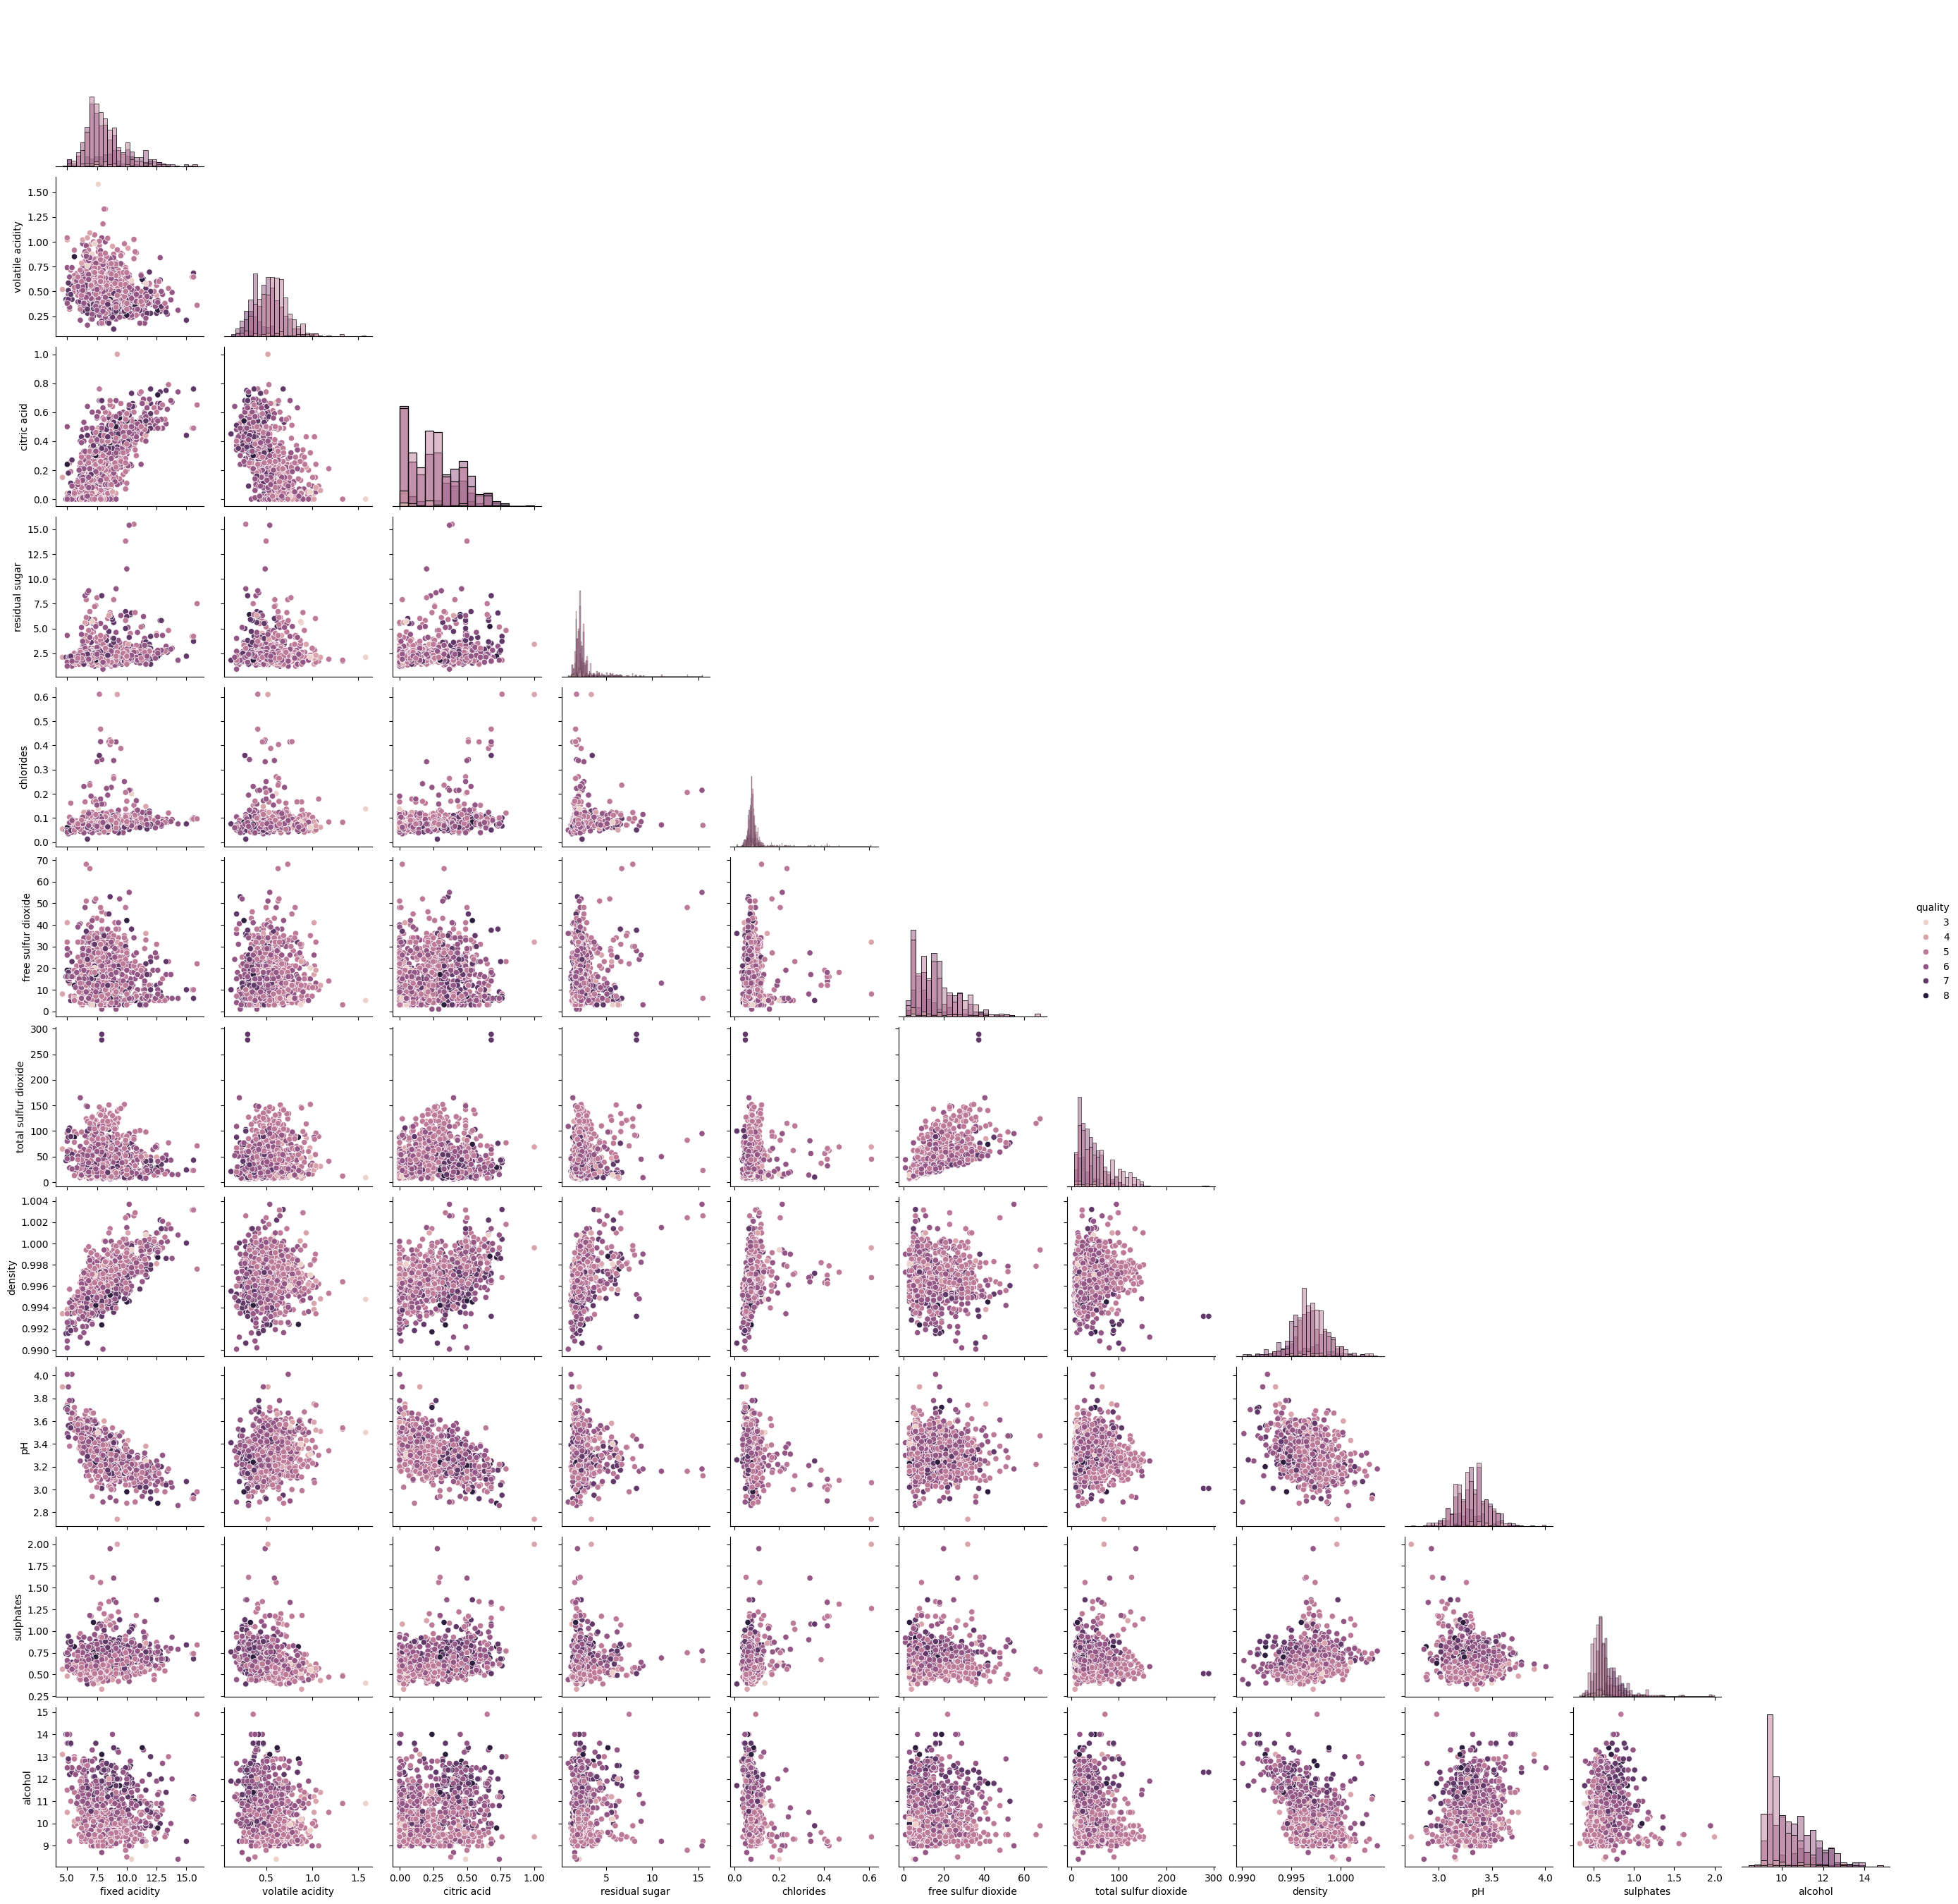

In [35]:
#Pairwise relationships (pairplot)

sns.pairplot(
    df[num_cols.tolist()],
    hue=target,
    diag_kind='hist', #just plot the histogram
    corner=True
)

plt.show()

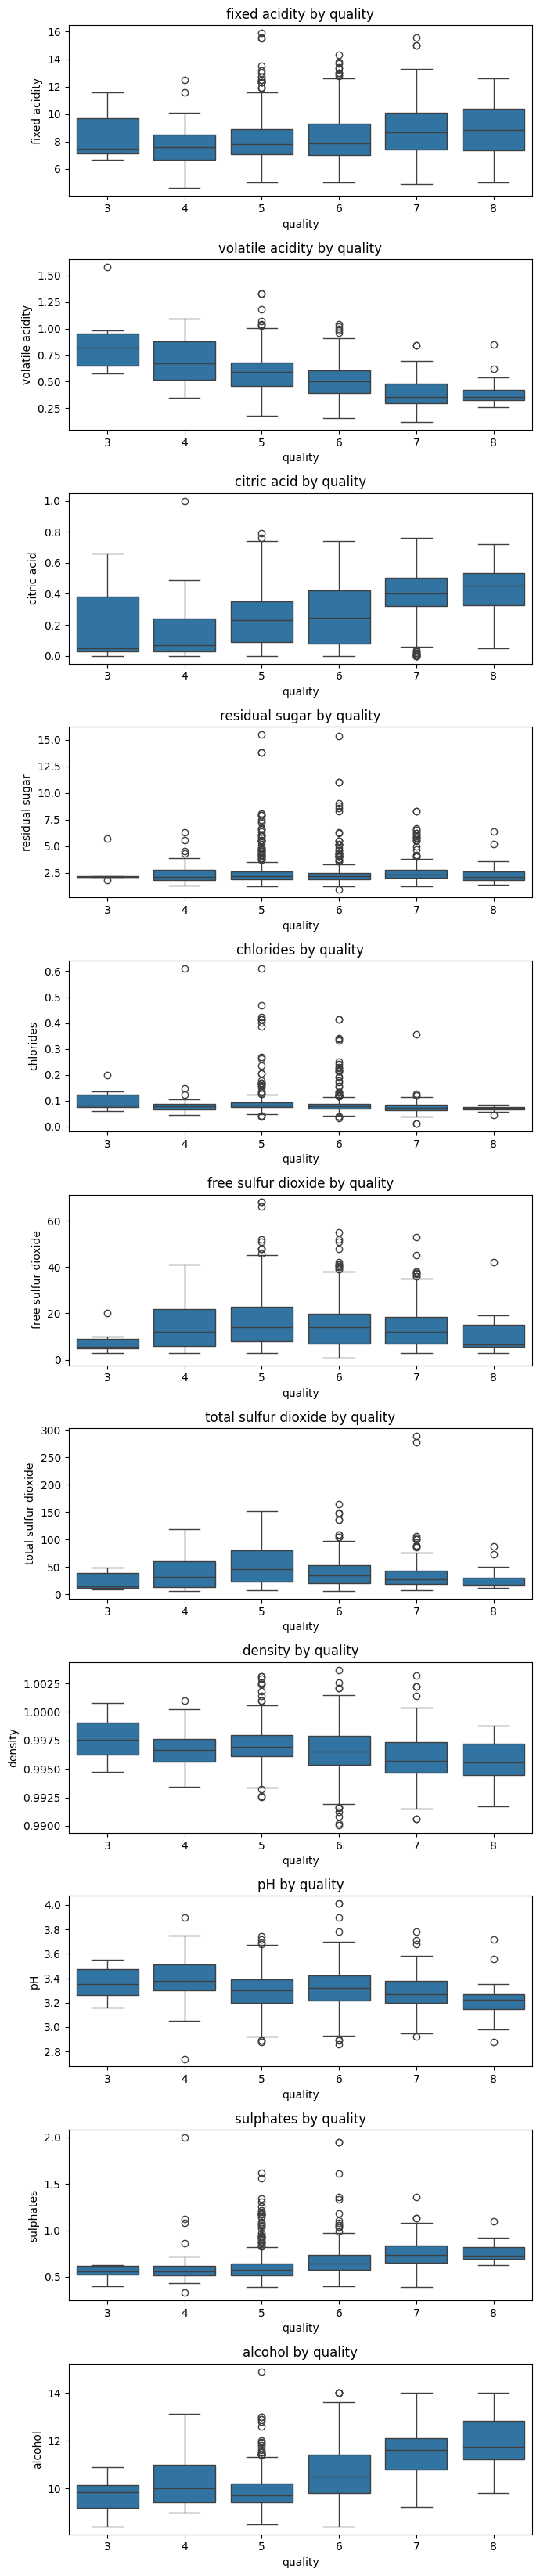

In [ ]:
# Scatter plots vs Target

target = 'quality'

dropCols = ['Id', target]
num_cols = (df.select_dtypes('number').columns.drop(dropCols, errors='ignore'))

fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(7,3*len(num_cols)), sharex = False)

if len(num_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, num_cols):     #zip pairs the elements indexes
    sns.boxplot(x=target, y=col, data=df, ax=ax)
    ax.set_title(f"{col} by {target}")

plt.tight_layout()
plt.show()

Comment for myself to what these plots show:
    On the X axis it is the quality.
    On the Y axis it is the respective column.
    The blue box: From Q1(25th percentile) till Q3(75th percentile)
    The line inside the blue box is the median.
    The segments are 1.5x(Q3-Q1) outside of the Q1 and Q3.
    The small circles are data outside of the segment.

3. Correlation Analysis: Check for correlations between features. Describe any significant correlations you find.

Correlation with quality:
 alcohol                 0.485
sulphates               0.258
citric acid             0.241
fixed acidity           0.122
residual sugar          0.022
pH                     -0.052
free sulfur dioxide    -0.063
chlorides              -0.124
density                -0.175
total sulfur dioxide   -0.183
volatile acidity       -0.407
Name: quality, dtype: float64

Top |corr| feature pairs:
 pH                    fixed acidity          0.685
density               fixed acidity          0.682
citric acid           fixed acidity          0.673
total sulfur dioxide  free sulfur dioxide    0.661
pH                    citric acid            0.546
citric acid           volatile acidity       0.544
alcohol               density                0.495
quality               alcohol                0.485
                      volatile acidity       0.407
density               residual sugar         0.380
dtype: float64


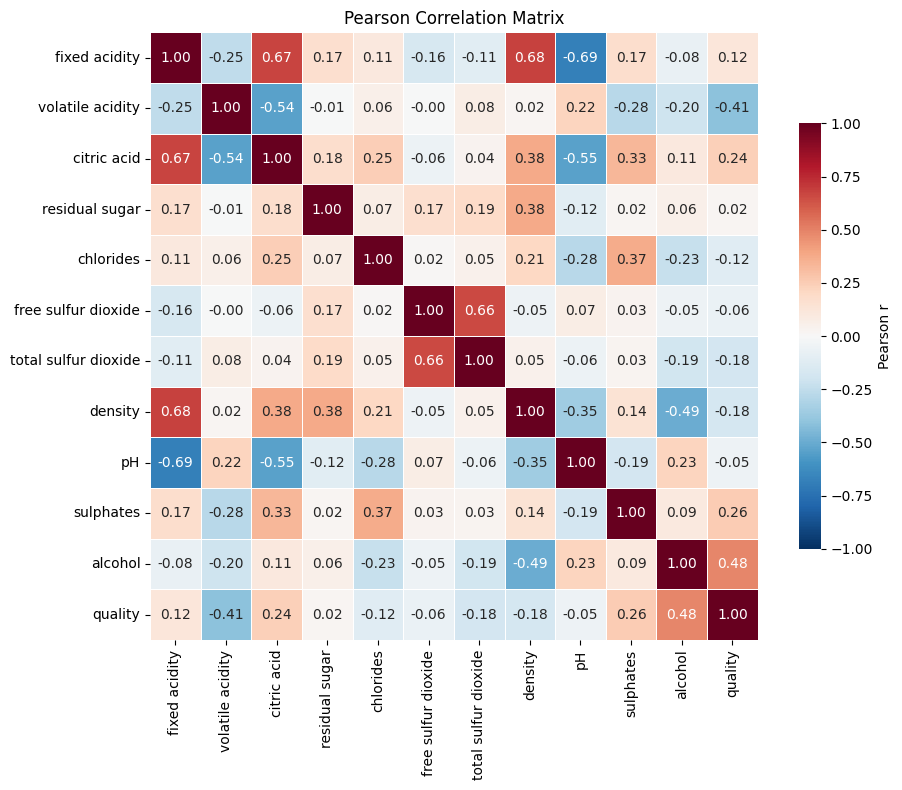

In [48]:
drop_cols = ['Id']
num_cols = df.select_dtypes('number').columns.drop(drop_cols, errors='ignore')

corr = df[num_cols].corr(method='pearson')

qual_corr = (
    corr['quality']
    .drop('quality')
    .sort_values(ascending=False)
)
print("Correlation with quality:\n", qual_corr.round(3))

abs_corr = corr.abs()
upper = abs_corr.where(~np.triu(np.ones_like(abs_corr, dtype=bool)))
top_pairs = (
    upper.stack()
        .sort_values(ascending=False)
        .head(10)
)
print("\nTop |corr| feature pairs:\n", top_pairs.round(3))



fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(
    corr,
    ax=ax,
    cmap='RdBu_r', vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    linewidths=.5, square=True,
    cbar_kws={'shrink': .7, 'label': 'Pearson r'}
)
ax.set_title("Pearson Correlation Matrix")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

The biggest correlation with quality is alcohol (0.485 which is approx double compared to the second one) followed by sulphate (0.258) and citric acid (0.241).
The biggest negative correlation with quality is volatile acidity (-0.407) more than double than the next one: total sulfur dioxide (-0.183)

The biggest negative correlation and the biggest absolute between all of the entries is between the 'pH' and the 'fixed acidity' (-0.69).
The biggest positive correlation is between the 'density' and also the 'fixed acidity (0.68).

4. Preprocess data: Preprocess the data by splitting it into training and testing sets. Apply scaling to the features. Why are these steps needed? What happened otherwise?

5. Clustering Analysis: Apply K-Means and two other clustering algorithms of your choice (https://scikit-learn.org/stable/modules/clustering.html for references)
    a. Plot the clustering results. See any differences?
    b. Determine the optimal number of clusters using the elbow method for kmeans. Explain how the elbow method helps in selecting the number of clusters.

6. Classification Analysis: Choose three different traditional classification algorithms (refer to scikit-learn classification documentation) and apply them to the dataset.
    a. Model Evaluation
        i. Display confusion matrix
        ii. Compute accuracy, precision, recall. What do they mean?
        iii. Plot the ROC curve for each model and explain what it represents.
    b. Parameter Tuning:
        i. Identify the key parameters for the chosen classification models.
        ii. Vary these parameters and analyze which combinations yield better results. Illustrate how the model's performance evolves with different parameter settings.
    c. Cross-Validation:
        i. Perform cross-validation on the classification models and compute the cross-validated accuracy, precision, and recall.
        ii. Discussion: Discuss the different cross-validation strategies (e.g., K-Fold, Leave-One-Out, Stratified K-Fold). Explain how they differ and when each strategy might be appropriate.